In [1]:
# Generate the data set

import numpy as np

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

In [2]:
## Normal Equation ##

# Using inv() from numpy's linear algera module (np.linalg)

x_b = np.c_[np.ones((100,1)),x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Actual function used to generate the data => y=4+3x1

theta_best

array([[3.63516921],
       [3.34850885]])

In [3]:
# Make predictions

x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new] # add x0 =1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.63516921],
       [10.3321869 ]])

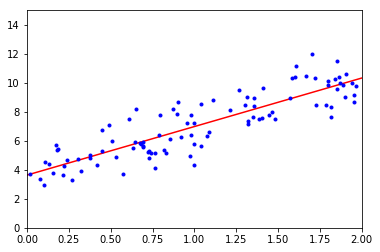

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, 'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.63516921]), array([[3.34850885]]))

In [10]:
lin_reg.predict(x_new)

array([[ 3.63516921],
       [10.3321869 ]])

In [11]:
# The LinearRegression class is based on the scipy.linalg.lstsq()function which you could call directly

theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.63516921],
       [3.34850885]])

In [12]:
# Use np.linalg.pinv() to compute teh pseudoinverse directly.

np.linalg.pinv(x_b).dot(y)

array([[3.63516921],
       [3.34850885]])